In [1]:
# --- Core Libraries ---
import pandas as pd
import numpy as np

# --- Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Notebook Configuration ---
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
# To display pandas DataFrames nicely in Colab
from IPython.display import display

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# --- Data Loading ---

# Google Drive File IDs
file_id_main = '1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK'
file_id_test = '1jC8LK-3_JE--23heWvgLVG4nwFKAWuPW'

# Construct direct download URLs
base_url = 'https://drive.google.com/uc?export=download&id='
url_main_dataset = f'{base_url}{file_id_main}'
url_test_dataset = f'{base_url}{file_id_test}'

# Load the datasets
try:
    df = pd.read_csv(url_main_dataset)
    df_test = pd.read_csv(url_test_dataset)
    print("Datasets loaded successfully!")

    # --- Initial Inspection (Main Dataset) ---

    # Display the first 5 rows
    print("\n--- DataFrame Head (Main Dataset) ---")
    display(df.head())

    # Get a concise summary of the DataFrame
    print("\n--- DataFrame Info (Main Dataset) ---")
    df.info()

except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the Google Drive links are public and accessible.")

Datasets loaded successfully!

--- DataFrame Head (Main Dataset) ---


,name,dastgah,instrument,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_1_mean,chroma_2_mean,...,mfcc_11_var,mfcc_12_var,mfcc_13_var,mfcc_14_var,mfcc_15_var,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var
0,ney-mahoor-ebrahimi .mp3,D_2,I_4,65545,1938.040517,303472.4474,2815.166310,1.754412e+06,0.515210,0.158007,...,482.619965,274.530334,257.260315,200.793167,177.008484,89.304535,49.159683,83.412254,154.657501,417.060425
1,Mohammad_Shojaei_nei_Mahoor.mp3,D_2,I_4,59788,1956.981873,774951.2677,2971.032035,2.082504e+06,0.209722,0.335278,...,435.338196,289.941559,337.219269,266.507416,256.131317,153.390289,90.073257,120.354729,206.031006,267.015015
2,Arash_Samimi_nei_Mahoor.mp3,D_2,I_4,85072,2735.525193,575671.7929,4268.615855,2.663909e+06,0.105867,0.108526,...,299.526794,226.705948,163.451355,140.664673,104.658630,72.048088,53.397228,83.085548,190.668487,331.626526
3,19 sarebaang mahoor.mp3,D_2,I_4,89980,2629.389833,406198.9319,4071.233715,1.005496e+06,0.153988,0.098157,...,305.978638,154.510696,281.793976,348.872650,156.062454,85.470512,45.904568,120.363800,370.077820,306.180878
4,Amjadian.mp3,D_2,I_4,58134,1659.262559,332341.1003,2789.041468,8.496746e+05,0.077795,0.036009,...,81.764854,106.146141,103.081779,85.252548,90.831291,150.201111,332.417633,299.858795,177.197845,186.112488



--- DataFrame Info (Main Dataset) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    926 non-null    object 
 1   dastgah                 926 non-null    object 
 2   instrument              926 non-null    object 
 3   zero_corssing           926 non-null    int64  
 4   spectral_centroid_mean  926 non-null    float64
 5   spectral_centroid_var   926 non-null    float64
 6   spectral_rolloff_mean   926 non-null    float64
 7   spectral_rolloff_var    926 non-null    float64
 8   chroma_1_mean           926 non-null    float64
 9   chroma_2_mean           926 non-null    float64
 10  chroma_3_mean           926 non-null    float64
 11  chroma_4_mean           926 non-null    float64
 12  chroma_5_mean           926 non-null    float64
 13  chroma_6_mean           926 non-null    float64
 14  chr

--- Analyzing Target Variable (dastgah) ---
Unique classes (Dastgahs) and their counts:
dastgah
D_3    144
D_6    142
D_5    141
D_2    139
D_0    122
D_1    122
D_4    116
Name: count, dtype: int64

Total number of unique classes: 7
This matches the 7 Dastgahs expected from the project description. Great!


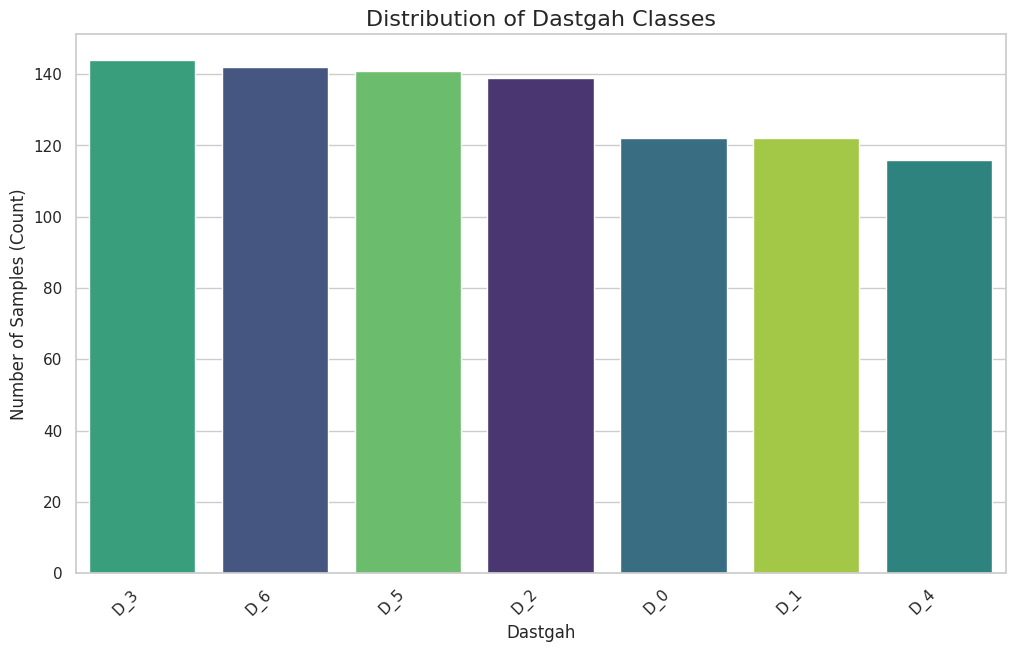

In [3]:
# --- (a) Part 1: Analyze Class Distribution (Corrected Plot) ---

print("--- Analyzing Target Variable (dastgah) ---")

# Define the target column name
target_column = 'dastgah'

# 1. Get the unique classes and their counts
class_counts = df[target_column].value_counts()
print(f"Unique classes (Dastgahs) and their counts:\n{class_counts}\n")

# 2. Get the number of unique classes
num_classes = len(class_counts)
print(f"Total number of unique classes: {num_classes}")
if num_classes == 7:
    print("This matches the 7 Dastgahs expected from the project description. Great!")
else:
    print(f"Warning: Expected 7 classes, but found {num_classes}.")

# 3. Plot the distribution (Corrected version to remove warning)
plt.figure(figsize=(12, 7))

# By setting hue=target_column and legend=False, we remove the warning
sns.countplot(data=df,
              x=target_column,
              hue=target_column,  # Add this line
              legend=False,       # Add this line
              order=class_counts.index,
              palette='viridis')

# Add titles and labels for clarity
plt.title('Distribution of Dastgah Classes', fontsize=16)
plt.xlabel('Dastgah', fontsize=12)
plt.ylabel('Number of Samples (Count)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [4]:
# --- (a) Part 2: Preprocessing and Data Splitting ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- 1. Define feature (X) and target (y) ---

# Define irrelevant columns that are not features
irrelevant_cols = ['name', 'instrument']

# Define the target column
target_column = 'dastgah'

# Create X (features): All columns EXCEPT irrelevant_cols and target_column
# We use .copy() to avoid potential SettingWithCopyWarning later
X = df.drop(columns=irrelevant_cols + [target_column]).copy()

# Create y (target): Just the target column
y = df[target_column]

# Store the column names BEFORE scaling (as scaling creates a NumPy array)
# We will need these names for plotting feature importance later
feature_names = X.columns.tolist()
print(f"Stored {len(feature_names)} feature names.")

# --- 2. Encode the Target Variable (y) ---
# ML models require numerical inputs. We convert text labels ('D_0', 'D_1'...)
# into integers (0, 1...). This is Label Encoding.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Let's display the mapping (e.g., 'D_0' -> 0)
print("--- Label Encoding Map ---")
# Using a loop to show the mapping clearly
for i, class_name in enumerate(le.classes_):
    print(f"'{class_name}'  ->  {i}")
# This mapping (le.classes_) will be useful later for interpretation

print("\n--- Data Shape Before Split ---")
print(f"X (features) shape: {X.shape}")
print(f"y_encoded (target) shape: {y_encoded.shape}")

# --- 3. Perform the Train-Test Split ---

# We split the data into 80% training and 20% testing (as specified in PDF part a)
# test_size=0.2 means 20% of data is reserved for testing
# random_state=42 ensures that we get the same split every time we
#                 run this code, making our results reproducible.
#
# !! BEST PRACTICE !!
# stratify=y_encoded ensures that the class distribution (even though
# it's mostly balanced) is preserved in BOTH the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded  # Still important for preserving the exact distribution
)

print("\n--- Data Shape After Split ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nSuccessfully created stratified train/test split.")

Stored 69 feature names.
--- Label Encoding Map ---
'D_0'  ->  0
'D_1'  ->  1
'D_2'  ->  2
'D_3'  ->  3
'D_4'  ->  4
'D_5'  ->  5
'D_6'  ->  6

--- Data Shape Before Split ---
X (features) shape: (926, 69)
y_encoded (target) shape: (926,)

--- Data Shape After Split ---
X_train shape: (740, 69)
y_train shape: (740,)
X_test shape: (186, 69)
y_test shape: (186,)

Successfully created stratified train/test split.


--- Verifying Class Distribution in Train and Test Sets ---
Train Set Class Counts:
 D_0     97
D_1     98
D_2    111
D_3    115
D_4     93
D_5    113
D_6    113
Name: count, dtype: int64

Test Set Class Counts:
 D_0    25
D_1    24
D_2    28
D_3    29
D_4    23
D_5    28
D_6    29
Name: count, dtype: int64


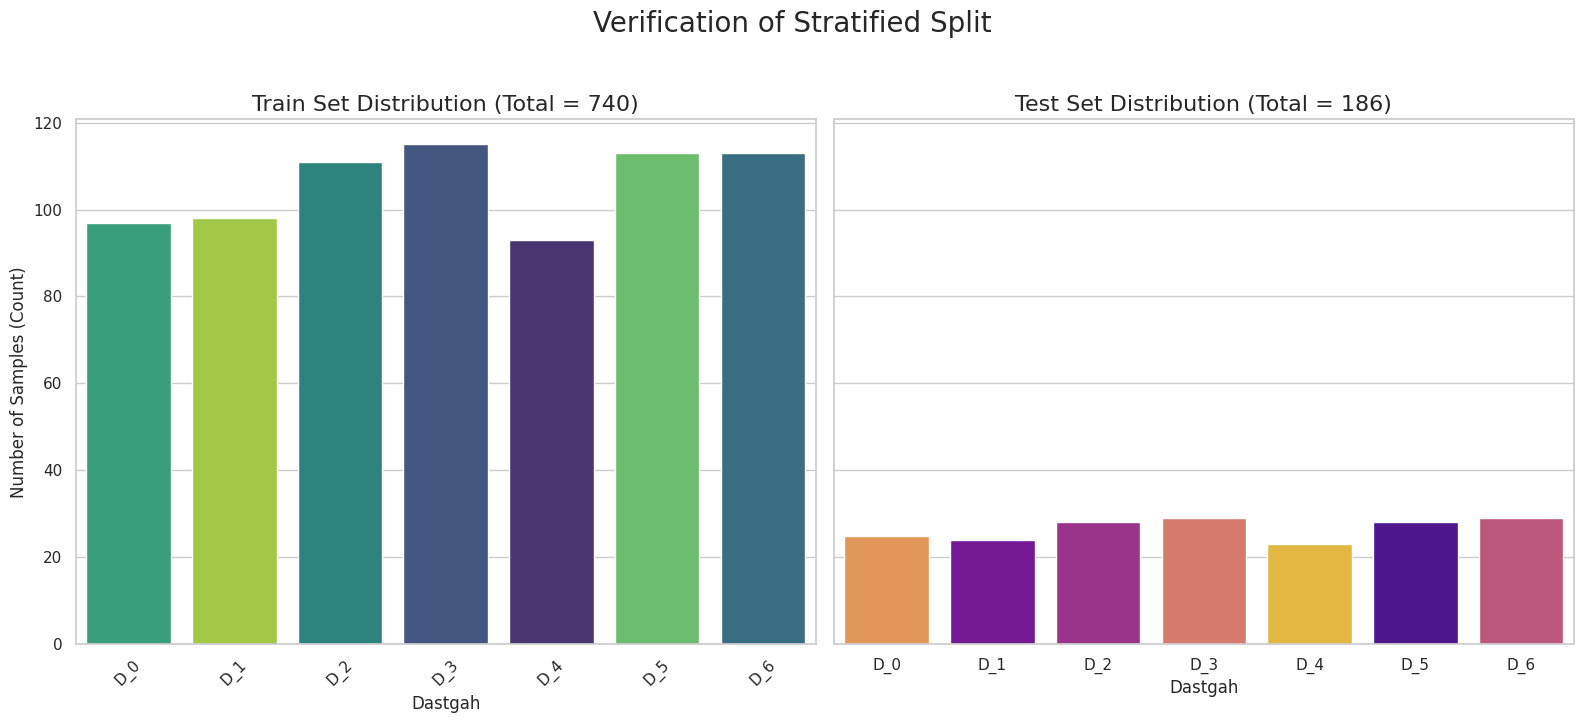

In [5]:
# --- (a) Part 2b: Verify Stratified Split ---

print("--- Verifying Class Distribution in Train and Test Sets ---")

# We need to convert the encoded labels (0, 1, 2...) back to text labels ('D_0', 'D_1'...)
# for plotting, as the text labels are more readable.
# The 'le' (LabelEncoder) object we created earlier remembers this mapping.

# 1. Convert y_train and y_test back to original labels
# le.inverse_transform() does this for us.
original_y_train = le.inverse_transform(y_train)
original_y_test = le.inverse_transform(y_test)

# 2. Get the value counts for train and test (sorted by index to match)
train_counts = pd.Series(original_y_train).value_counts().sort_index()
test_counts = pd.Series(original_y_test).value_counts().sort_index()

print("Train Set Class Counts:\n", train_counts)
print("\nTest Set Class Counts:\n", test_counts)

# --- Plotting Side-by-Side ---

# Create a figure and a set of two subplots (axes)
# 1 row, 2 columns. sharey=True means they share the same Y-axis scale.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Define the order of classes (alphabetical) for consistent plotting
class_order = sorted(le.classes_)

# --- Plot 1: Training Set Distribution ---
sns.countplot(x=original_y_train,
              order=class_order,
              ax=ax1,
              palette='viridis',
              hue=original_y_train, # To handle the future warning
              legend=False)
ax1.set_title(f'Train Set Distribution (Total = {len(y_train)})', fontsize=16)
ax1.set_xlabel('Dastgah', fontsize=12)
ax1.set_ylabel('Number of Samples (Count)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# --- Plot 2: Test Set Distribution ---
sns.countplot(x=original_y_test,
              order=class_order,
              ax=ax2,
              palette='plasma', # Using a different palette for distinction
              hue=original_y_test, # To handle the future warning
              legend=False)
ax2.set_title(f'Test Set Distribution (Total = {len(y_test)})', fontsize=16)
ax2.set_xlabel('Dastgah', fontsize=12)
ax2.set_ylabel('') # No Y-label, as it's shared with ax1

# Add a main title for the whole figure
plt.suptitle('Verification of Stratified Split', fontsize=20, y=1.03)

# Show the plot
plt.tight_layout() # Adjusts plot params for a tight layout
plt.show()

--- Calculating Correlation Matrix ---
Correlation matrix calculated. Shape: (69, 69)
Displaying the top 5 rows and columns of the matrix (a small peek):


,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var
zero_corssing,1.000000,0.884159,0.164290,0.750015,0.193105
spectral_centroid_mean,0.884159,1.000000,0.217281,0.922942,0.373303
spectral_centroid_var,0.164290,0.217281,1.000000,0.153786,0.656926
spectral_rolloff_mean,0.750015,0.922942,0.153786,1.000000,0.390518
spectral_rolloff_var,0.193105,0.373303,0.656926,0.390518,1.000000



--- Plotting Correlation Heatmap ---


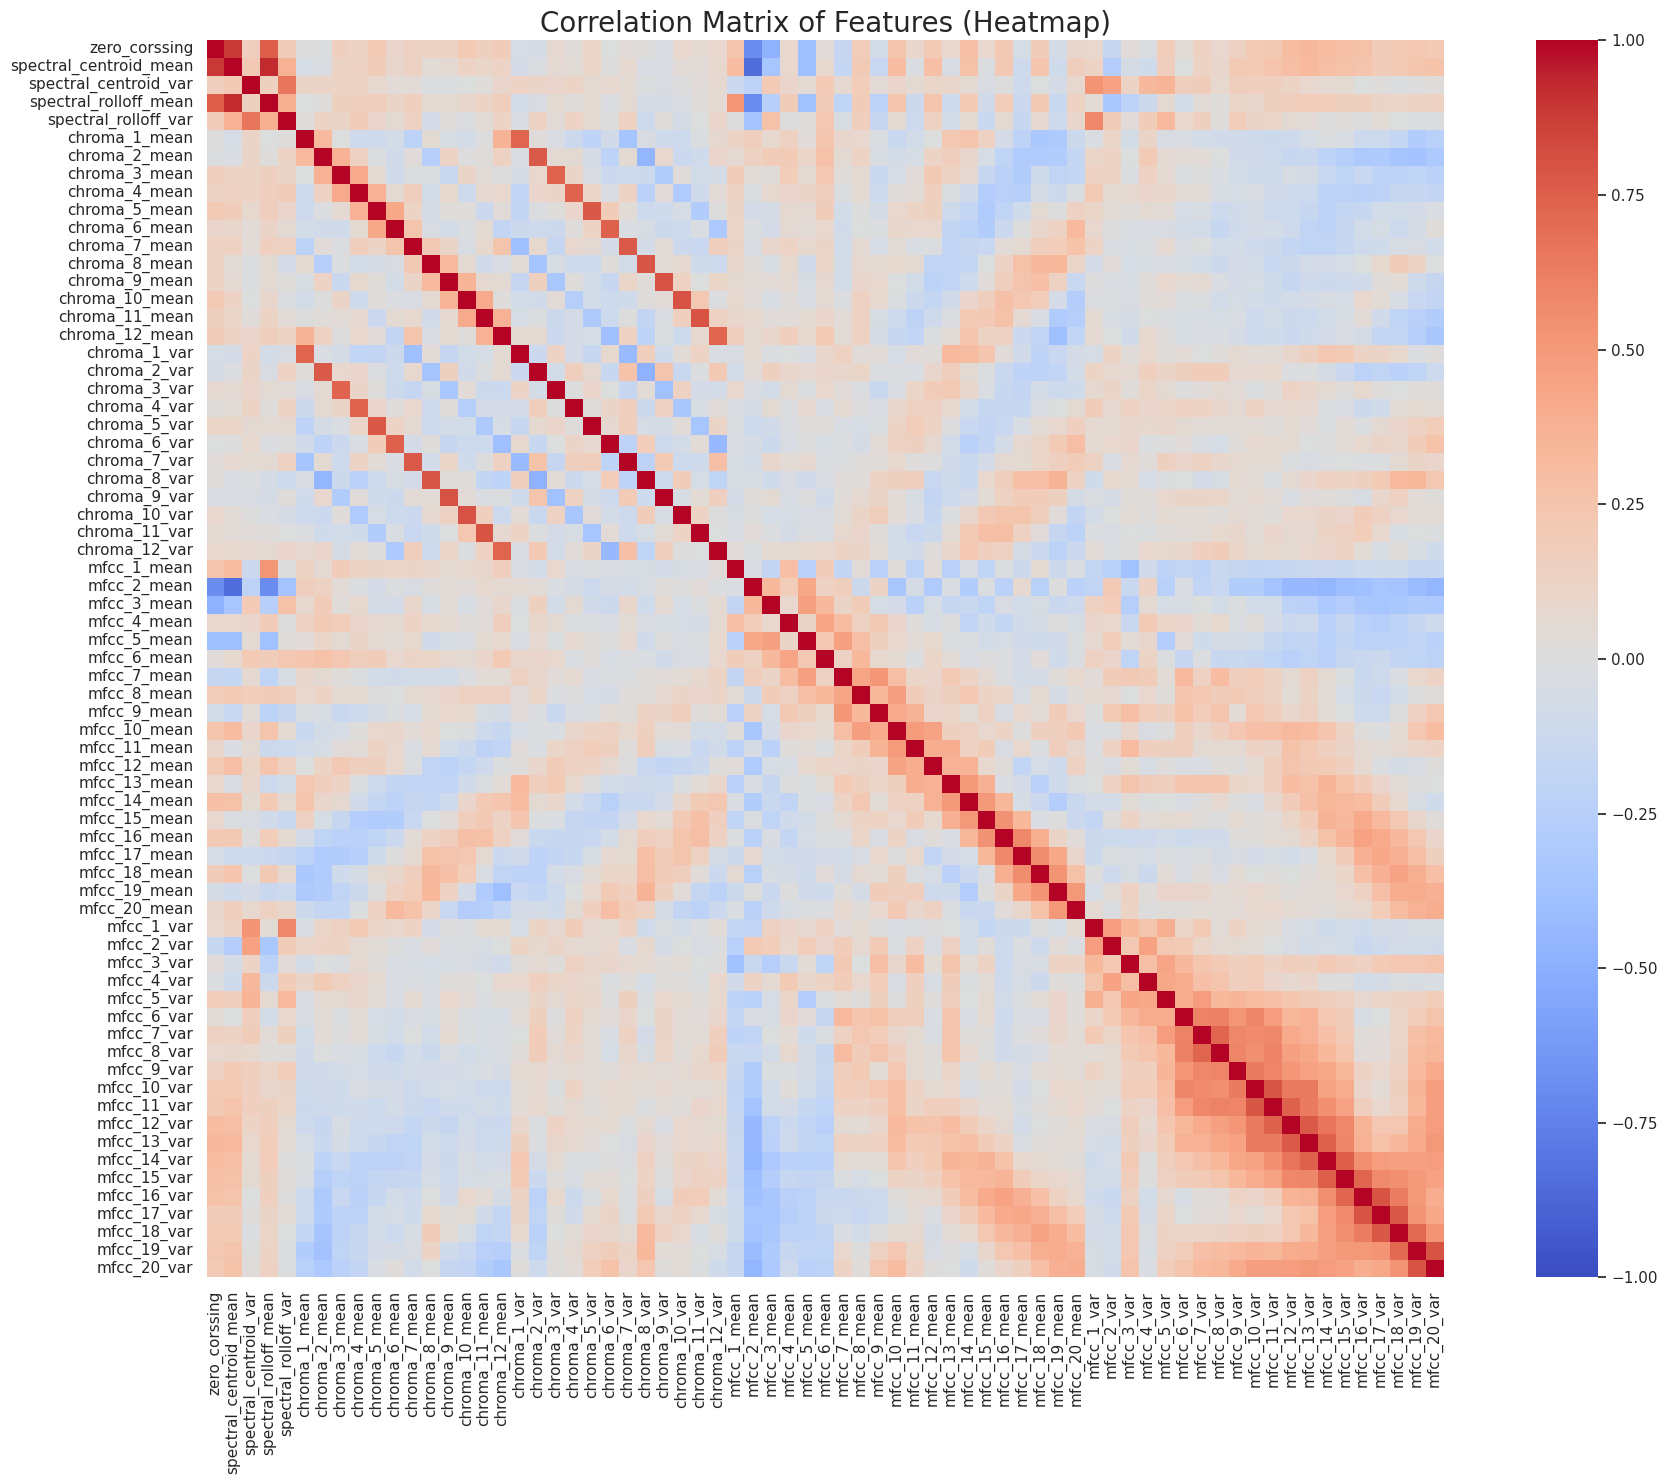

In [6]:
# --- (a) Part 3: Correlation Matrix Analysis ---

print("--- Calculating Correlation Matrix ---")

# 1. Calculate the correlation matrix
# We do this ONLY on the training data (X_train) to prevent data leakage.
# .corr() computes the Pearson correlation coefficient between all pairs of columns.
corr_matrix = X_train.corr()

print("Correlation matrix calculated. Shape:", corr_matrix.shape)
print("Displaying the top 5 rows and columns of the matrix (a small peek):")
# Displaying just the corner of the large 69x69 matrix
from IPython.display import display
display(corr_matrix.iloc[:5, :5])


# --- 2. Plotting the Heatmap ---
print("\n--- Plotting Correlation Heatmap ---")

# A large figure is needed for 69x69 features
plt.figure(figsize=(20, 15))

# Create the heatmap
# vmin=-1, vmax=1 sets the color bar range from -1 to 1.
# center=0 ensures that 0 (no correlation) is the neutral color (white).
# cmap='coolwarm' is a good diverging colormap (Red for positive, Blue for negative).
sns.heatmap(corr_matrix,
            annot=False, # We set annot=False because 69x69 labels are unreadable
            fmt=".1f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            square=True) # Makes the plot square

plt.title('Correlation Matrix of Features (Heatmap)', fontsize=20)
# Adjust layout to prevent title/labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
# --- (a) Part 4: Standard Scaling ---
# This cell assumes X_train and X_test exist from the previous cell

from sklearn.preprocessing import StandardScaler

print("\n--- (a) Part 4: Applying StandardScaler ---")

# 1. Create an instance of the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler ONLY on the training data (X_train)
# This learns the mean and std (μ and σ) from the training set.
scaler.fit(X_train)

# 3. Transform both X_train and X_test using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully scaled.")

# --- 4. Verification (Check the result) ---
print("\n--- Verification of Scaling (on X_train_scaled) ---")
# We check the first feature (index 0), which is 'zero_corssing'
print(f"Original X_train['zero_corssing'].mean(): {X_train['zero_corssing'].mean():.2f}")
print(f"Scaled X_train_scaled[:, 0].mean():   {X_train_scaled[:, 0].mean():.2f}")
print(f"Scaled X_train_scaled[:, 0].std():    {X_train_scaled[:, 0].std():.2f}")

print("\n--- Verification of Scaling (on X_test_scaled) ---")
print(f"Original X_test['zero_corssing'].mean(): {X_test['zero_corssing'].mean():.2f}")
print(f"Scaled X_test_scaled[:, 0].mean():   {X_test_scaled[:, 0].mean():.2f}")
print(f"Scaled X_test_scaled[:, 0].std():    {X_test_scaled[:, 0].std():.2f}")

# Note: X_train_scaled is now a NumPy array
print(f"\nType of X_train_scaled: {type(X_train_scaled)}")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")


--- (a) Part 4: Applying StandardScaler ---
Data successfully scaled.

--- Verification of Scaling (on X_train_scaled) ---
Original X_train['zero_corssing'].mean(): 68724.31
Scaled X_train_scaled[:, 0].mean():   0.00
Scaled X_train_scaled[:, 0].std():    1.00

--- Verification of Scaling (on X_test_scaled) ---
Original X_test['zero_corssing'].mean(): 66479.51
Scaled X_test_scaled[:, 0].mean():   -0.07
Scaled X_test_scaled[:, 0].std():    0.93

Type of X_train_scaled: <class 'numpy.ndarray'>
Shape of X_train_scaled: (740, 69)



--- (a) Part 5: Running Feature Selection (SelectKBest) ---
Top 20 most important features:


,Feature,Score
27,chroma_11_var,8.433388
0,zero_corssing,7.656721
20,chroma_4_var,6.613274
8,chroma_4_mean,6.387055
26,chroma_10_var,6.150822
62,mfcc_14_var,5.953532
25,chroma_9_var,5.788734
28,chroma_12_var,5.325783
1,spectral_centroid_mean,5.067422
43,mfcc_15_mean,5.020482



--- Plotting Top 20 Feature Importances ---


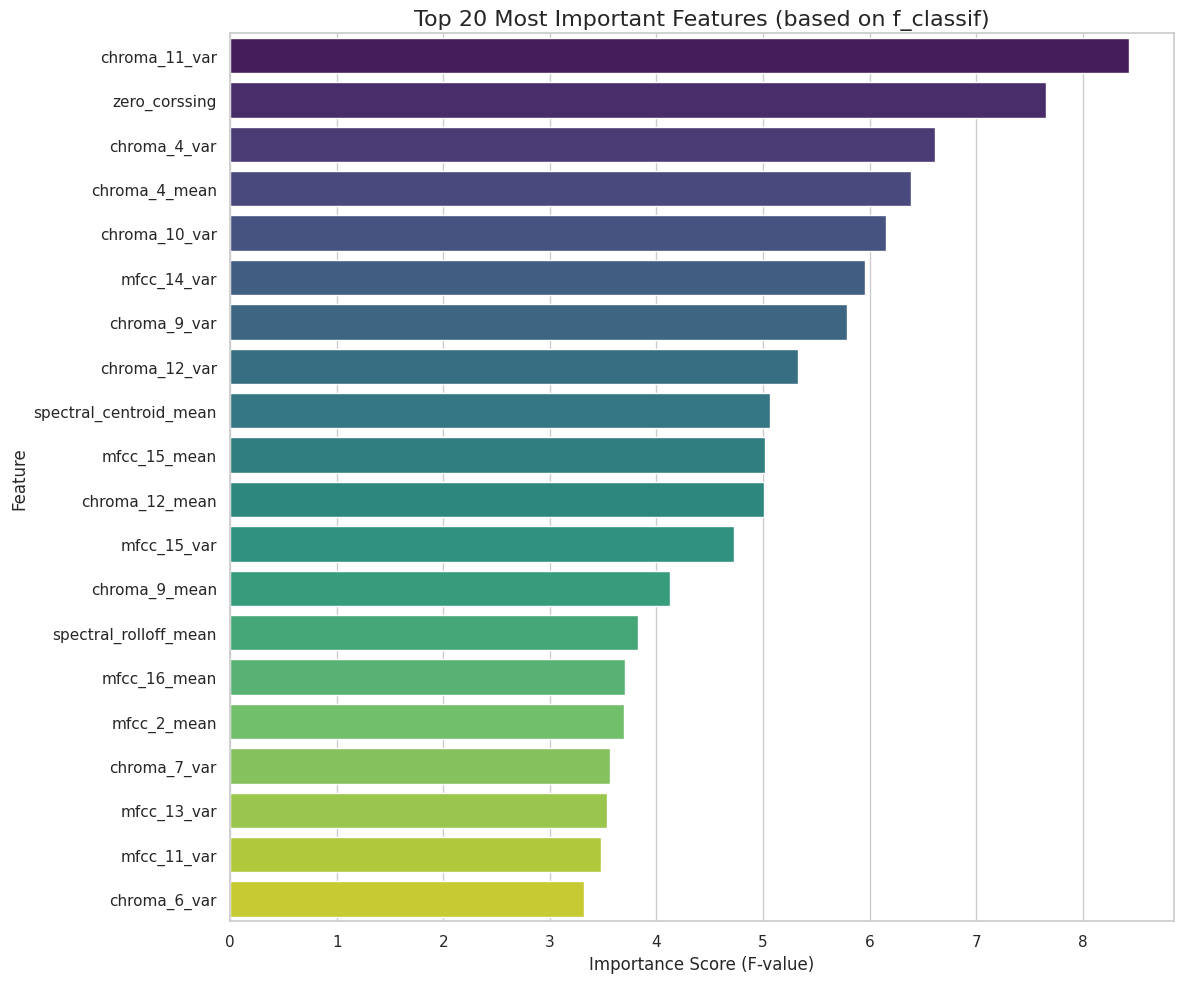

In [8]:
# --- (a) Part 5: Feature Selection (SelectKBest) ---

# Import the new libraries needed just for this step
from sklearn.feature_selection import SelectKBest, f_classif
# We also need pandas and plotting libraries, but they are likely already imported.
# For safety, we can re-import them if needed, but it's cleaner to have them all at the top.
# Let's assume they are available. If you get an error, we'll add them.

print("\n--- (a) Part 5: Running Feature Selection (SelectKBest) ---")

# We assume 'X_train_scaled', 'y_train', and 'feature_names'
# are already in memory from running the previous cells.

# 1. Initialize the Feature Selector
# We want to select the top 20 features
# k=20 means "Select the 20 Best"
# score_func=f_classif is the statistical test (ANOVA F-value)
# It's good for numerical inputs (X) and categorical output (y)
fs = SelectKBest(score_func=f_classif, k=20)

# 2. Run the feature selection
# We fit it on the SCALED training data and the training labels
fs.fit(X_train_scaled, y_train)

# 3. Create a DataFrame to view the scores
# fs.scores_ contains the F-value score for ALL 69 features
# 'feature_names' was defined in the previous cell
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': fs.scores_
})

# 4. Sort the features by score in descending order
top_features = feature_scores.sort_values(by='Score', ascending=False)

print("Top 20 most important features:")
display(top_features.head(20))

# --- 5. Plotting the scores of the Top 20 Features ---
print("\n--- Plotting Top 20 Feature Importances ---")
plt.figure(figsize=(12, 10))
sns.barplot(data=top_features.head(20),
            x='Score',
            y='Feature',
            palette='viridis',
            hue='Feature', # Added to handle seaborn warning
            legend=False)
plt.title('Top 20 Most Important Features (based on f_classif)', fontsize=16)
plt.xlabel('Importance Score (F-value)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

Training MLP with 'relu' activation...
Training complete.

--- Evaluation for MLP with 'relu' ---
Classification Report:
              precision    recall  f1-score   support

         D_0       0.50      0.36      0.42        25
         D_1       0.47      0.62      0.54        24
         D_2       0.42      0.29      0.34        28
         D_3       0.44      0.41      0.43        29
         D_4       0.56      0.39      0.46        23
         D_5       0.58      0.75      0.66        28
         D_6       0.45      0.59      0.51        29

    accuracy                           0.49       186
   macro avg       0.49      0.49      0.48       186
weighted avg       0.49      0.49      0.48       186

Generating Normalized Confusion Matrix...


<Figure size 1000x800 with 0 Axes>

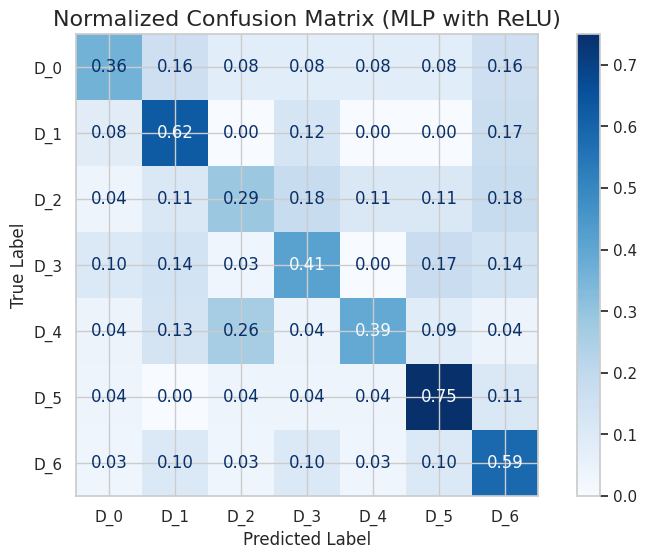

In [9]:
# --- (b) Part 1: Initial MLP Classifier (using 'relu') ---

# Import necessary libraries for MLP and evaluation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Initialize the MLP Classifier
# We'll start with a simple architecture and the 'relu' activation function.
# hidden_layer_sizes=(100, 50): Two hidden layers. The first with 100 neurons, the second with 50.
# activation='relu': The Rectified Linear Unit activation function.
# solver='adam': The optimizer algorithm to use (Adam is a good default).
# max_iter=1000: The maximum number of training epochs. We set it high to ensure convergence.
# random_state=42: For reproducibility of results.
mlp_relu = MLPClassifier(hidden_layer_sizes=(100, 50),
                         activation='relu',
                         solver='adam',
                         max_iter=1000,
                         random_state=42)

# 2. Train the model using the SCALED training data
print("Training MLP with 'relu' activation...")
mlp_relu.fit(X_train_scaled, y_train)
print("Training complete.")

# 3. Make predictions on the SCALED test set
y_pred_relu = mlp_relu.predict(X_test_scaled)

# 4. Evaluate the model's performance
print("\n--- Evaluation for MLP with 'relu' ---")

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
# We use 'le.classes_' to display the original class names (D_0, D_1, ...) in the report
print(classification_report(y_test, y_pred_relu, target_names=le.classes_))

# Confusion Matrix (Normalized to show percentages)
print("Generating Normalized Confusion Matrix...")
# Calculate the confusion matrix
cm_relu = confusion_matrix(y_test, y_pred_relu)
# Normalize the matrix by dividing each row by the sum of that row
# This converts raw counts to percentages, making it easier to see per-class performance
cm_relu_normalized = cm_relu.astype('float') / cm_relu.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_relu_normalized,
                              display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f') # Format numbers to 2 decimal places
plt.title('Normalized Confusion Matrix (MLP with ReLU)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

Training MLP with 'tanh' activation...
Training complete.

--- Evaluation for MLP with 'tanh' ---
Classification Report:
              precision    recall  f1-score   support

         D_0       0.33      0.28      0.30        25
         D_1       0.45      0.54      0.49        24
         D_2       0.40      0.29      0.33        28
         D_3       0.50      0.38      0.43        29
         D_4       0.38      0.39      0.38        23
         D_5       0.43      0.54      0.48        28
         D_6       0.43      0.52      0.47        29

    accuracy                           0.42       186
   macro avg       0.42      0.42      0.41       186
weighted avg       0.42      0.42      0.41       186

Generating Normalized Confusion Matrix...


<Figure size 1000x800 with 0 Axes>

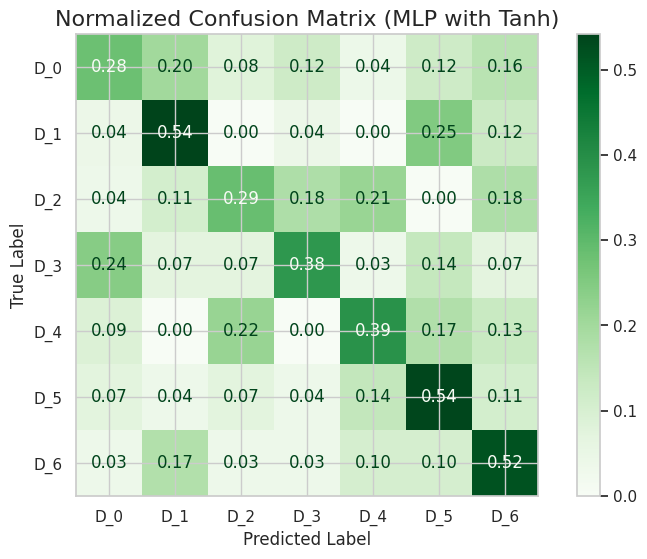

In [10]:
# --- (b) Part 2: MLP Classifier with 'tanh' activation ---

# Import necessary libraries (already done, but good practice to have them)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# 1. Initialize the MLP Classifier with 'tanh'
# We keep all other parameters the same as the 'relu' model for a fair comparison.
# hidden_layer_sizes=(100, 50)
# solver='adam'
# max_iter=1000
# random_state=42
mlp_tanh = MLPClassifier(hidden_layer_sizes=(100, 50),
                         activation='tanh', # The only change
                         solver='adam',
                         max_iter=1000,
                         random_state=42)

# 2. Train the model
print("Training MLP with 'tanh' activation...")
mlp_tanh.fit(X_train_scaled, y_train)
print("Training complete.")

# 3. Make predictions
y_pred_tanh = mlp_tanh.predict(X_test_scaled)

# 4. Evaluate the model
print("\n--- Evaluation for MLP with 'tanh' ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_tanh, target_names=le.classes_))

print("Generating Normalized Confusion Matrix...")
cm_tanh = confusion_matrix(y_test, y_pred_tanh)
cm_tanh_normalized = cm_tanh.astype('float') / cm_tanh.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tanh_normalized,
                              display_labels=le.classes_)
disp.plot(cmap=plt.cm.Greens, values_format='.2f') # Use a different color map for distinction
plt.title('Normalized Confusion Matrix (MLP with Tanh)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [11]:
# (c) Part 3: Final Comprehensive GridSearchCV
# --- We tune 'hidden_layer_sizes' AND 'alpha' simultaneously ---

from sklearn.model_selection import GridSearchCV

print("--- (c) Part 3: Starting Comprehensive GridSearchCV ---")
print("Tuning 'hidden_layer_sizes' and 'alpha'...")

# 1. Define the model (we don't need to set params here, grid will do it)
mlp_final_grid = MLPClassifier(activation='relu',
                               solver='adam',
                               max_iter=1000,
                               random_state=42)

# 2. Define the FINAL "grid" of parameters.
# This grid will test combinations of architecture and regularization.
param_grid_final = {
    'hidden_layer_sizes': [
        (50,),           # Your hypothesis: a simpler model
        (100,),          # A standard single-layer model
        (100, 50)        # Our original baseline model [cite: 705]
    ],
    'alpha': [
        0.01,            # Very light regularization
        0.1,             # Moderate regularization
        1                # Strong regularization (from our first gridsearch)
    ]
}

# 3. Initialize GridSearchCV
# This will run 3x3 = 9 combinations.
# Each combination will run with 5-Fold CV.
# Total fits = 9 * 5 = 45 fits. This will take time.
grid_search_final = GridSearchCV(
    estimator=mlp_final_grid,
    param_grid=param_grid_final,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

# 4. Run the search on our 69-feature scaled data
print("Fitting Final GridSearchCV... This may take 5-10 minutes.")
grid_search_final.fit(X_train_scaled, y_train)

# 5. Report the results
print("\n--- FINAL GridSearchCV (MLP) Results ---")
print(f"Best parameters found: {grid_search_final.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_final.best_score_:.4f}")

# 6. Save the best model found
best_mlp_model = grid_search_final.best_estimator_
print(f"\nSaved the best model as 'best_mlp_model'.")

--- (c) Part 3: Starting Comprehensive GridSearchCV ---
Tuning 'hidden_layer_sizes' and 'alpha'...
Fitting Final GridSearchCV... This may take 5-10 minutes.
Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- FINAL GridSearchCV (MLP) Results ---
Best parameters found: {'alpha': 1, 'hidden_layer_sizes': (100,)}
Best cross-validation accuracy: 0.4027

Saved the best model as 'best_mlp_model'.


In [12]:
# --- Cell 12: (d) Part 1 - Manual Feature Engineering (Safe Version) ---
# This version creates NEW variables for the 70-feature dataset
# to avoid overwriting our original 69-feature scaled data.

import pandas as pd
from sklearn.preprocessing import StandardScaler

print("--- (d) Part 1: Manual Feature Engineering (Safe Version) ---")

# 1. Identify the source feature columns
mfcc_var_cols = [f'mfcc_{i}_var' for i in range(1, 21)]

# 2. Create new DataFrame copies to hold the 70-feature data
# X_train and X_test (from Cell 4) remain our 69-feature source
X_train_70f = X_train.copy()
X_test_70f = X_test.copy()

# 3. Create the new feature in the NEW DataFrames
X_train_70f['avg_mfcc_variance'] = X_train_70f[mfcc_var_cols].mean(axis=1)
X_test_70f['avg_mfcc_variance'] = X_test_70f[mfcc_var_cols].mean(axis=1)

print("New feature 'avg_mfcc_variance' created in 'X_train_70f' and 'X_test_70f'.")
print(f"Shape of X_train_70f: {X_train_70f.shape}") # (740, 70)
print(f"Shape of X_test_70f: {X_test_70f.shape}")   # (186, 70)

# 4. Create a NEW list of feature names for the 70 features
feature_names_70f = feature_names.copy()
feature_names_70f.append('avg_mfcc_variance')
print(f"New feature names list 'feature_names_70f' created. Total: {len(feature_names_70f)}")

# 5. Create a NEW StandardScaler for the 70-feature dataset
print("\nCreating and fitting a new StandardScaler ('scaler_70f')...")
scaler_70f = StandardScaler()

# Fit the new scaler ONLY on the new X_train_70f
scaler_70f.fit(X_train_70f)

# 6. Create NEW scaled variables
# Our original X_train_scaled and X_test_scaled are untouched.
X_train_scaled_70f = scaler_70f.transform(X_train_70f)
X_test_scaled_70f = scaler_70f.transform(X_test_70f)

print("Data successfully scaled into 'X_train_scaled_70f' and 'X_test_scaled_70f'.")
print(f"New X_train_scaled_70f shape: {X_train_scaled_70f.shape}")
print(f"New X_test_scaled_70f shape: {X_test_scaled_70f.shape}")

# 7. Verification (Check the mean/std of the new feature)
print("\n-- Verification of new feature scaling --")
print(f"Mean of 'avg_mfcc_variance' in X_train_scaled_70f: {X_train_scaled_70f[:, -1].mean():.2f}")
print(f"Std of 'avg_mfcc_variance' in X_train_scaled_70f: {X_train_scaled_70f[:, -1].std():.2f}")

--- (d) Part 1: Manual Feature Engineering (Safe Version) ---
New feature 'avg_mfcc_variance' created in 'X_train_70f' and 'X_test_70f'.
Shape of X_train_70f: (740, 70)
Shape of X_test_70f: (186, 70)
New feature names list 'feature_names_70f' created. Total: 70

Creating and fitting a new StandardScaler ('scaler_70f')...
Data successfully scaled into 'X_train_scaled_70f' and 'X_test_scaled_70f'.
New X_train_scaled_70f shape: (740, 70)
New X_test_scaled_70f shape: (186, 70)

-- Verification of new feature scaling --
Mean of 'avg_mfcc_variance' in X_train_scaled_70f: 0.00
Std of 'avg_mfcc_variance' in X_train_scaled_70f: 1.00


--- (d) Part 2: Building and Training the Autoencoder ---
Autoencoder Model Summary:


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)              │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ENCODER_1 (Dense)               │ (None, 64)             │         4,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BOTTLENECK (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DECODER_1 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Dense)                  │ (None, 70)             │         4,550 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,286 (51.90 KB)

 Trainable params: 13,286 (51.90 KB)

 Non-trainable params: 0 (0.00 B)


Training Autoencoder...
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.0483 - val_loss: 0.9775
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9442 - val_loss: 0.9264
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8857 - val_loss: 0.8447
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7942 - val_loss: 0.7423
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6949 - val_loss: 0.6574
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6127 - val_loss: 0.5902
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5464 - val_loss: 0.5398
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4964 - val_loss: 0.5034
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4595 - val_loss: 0.4759
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4304 - val_loss: 0.4517
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4058 - val_loss: 0.4308
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━

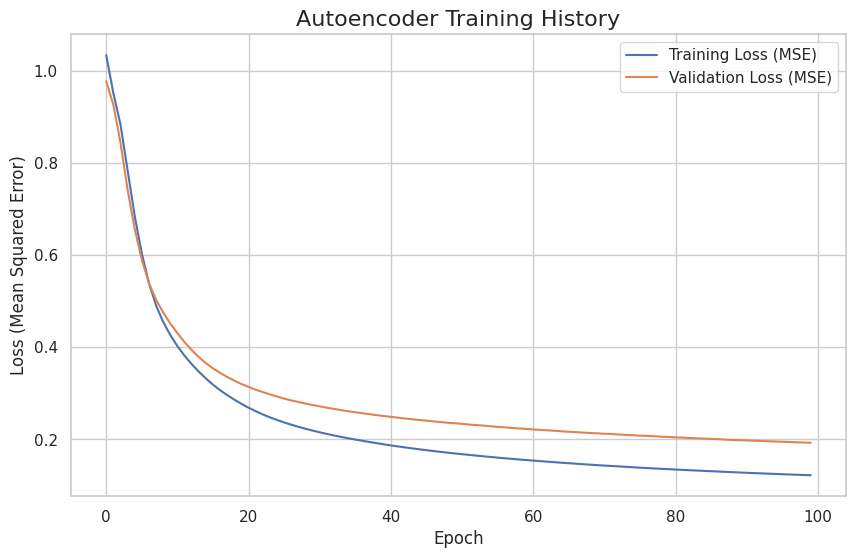


Extracting new 'encoded' features...
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
New encoded training data shape: (740, 32)
New encoded test data shape: (186, 32)


In [13]:
# --- Cell 13: (d) Part 2 - Design & Train Autoencoder ---
# We will build a stacked autoencoder to perform non-linear
# feature extraction, compressing 70 features into 32.

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

print("--- (d) Part 2: Building and Training the Autoencoder ---")
tf.random.set_seed(42) # For reproducibility

# 1. Define the dimensions
# We use the 70-feature dataset from the previous step
input_dim = X_train_scaled_70f.shape[1]  # This should be 70
encoding_dim = 32  # This is our bottleneck size (a hyperparameter)

# --- 2. Define the Encoder and Decoder Architecture ---

# Input layer
input_layer = Input(shape=(input_dim,), name="INPUT")

# Encoder layers: 70 -> 64 -> 32 (bottleneck)
encoded = Dense(64, activation='relu', name="ENCODER_1")(input_layer)
encoded = Dense(encoding_dim, activation='relu', name="BOTTLENECK")(encoded)

# Decoder layers: 32 -> 64 -> 70 (reconstruction)
decoded = Dense(64, activation='relu', name="DECODER_1")(encoded)
# Output activation is 'linear' because our input data (X_train_scaled_70f)
# is standardized (mean 0, std 1), not scaled between 0 and 1.
decoded = Dense(input_dim, activation='linear', name="OUTPUT")(decoded)

# --- 3. Build the Autoencoder Model ---
# The full AE model maps the input to its reconstruction
autoencoder = Model(input_layer, decoded, name="Autoencoder")

# Compile the Autoencoder
# We use 'mean_squared_error' to minimize the reconstruction error
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

print("Autoencoder Model Summary:")
autoencoder.summary()

# --- 4. Train the Autoencoder ---
# **CRITICAL**: The input (X) AND the target (y) are BOTH X_train_scaled_70f.
# The model learns to predict its own input (unsupervised learning).
print("\nTraining Autoencoder...")
history = autoencoder.fit(X_train_scaled_70f, X_train_scaled_70f,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2, # Use 20% of train data for validation
                          verbose=1)

print("Autoencoder training complete.")

# --- 5. Plot Training & Validation Loss ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Autoencoder Training History', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Create the standalone Encoder Model ---
# This new model takes the original input and stops at the bottleneck
encoder = Model(input_layer, encoded, name="Encoder")

# --- 7. Extract (Transform) the data into new features ---
# We now use the trained 'encoder' to create our new datasets
print("\nExtracting new 'encoded' features...")
X_train_encoded = encoder.predict(X_train_scaled_70f)
X_test_encoded = encoder.predict(X_test_scaled_70f)

print(f"New encoded training data shape: {X_train_encoded.shape}") # (740, 32)
print(f"New encoded test data shape: {X_test_encoded.shape}")     # (186, 32)


--- (d) Part 2: Repeating Part (b) on AE Features ---
Training MLP on 32 encoded features...
Training complete.

--- Evaluation for MLP with Autoencoder Features ---
Classification Report (AE Features):
              precision    recall  f1-score   support

         D_0       0.21      0.24      0.23        25
         D_1       0.29      0.21      0.24        24
         D_2       0.48      0.43      0.45        28
         D_3       0.28      0.31      0.30        29
         D_4       0.22      0.26      0.24        23
         D_5       0.40      0.36      0.38        28
         D_6       0.50      0.55      0.52        29

    accuracy                           0.34       186
   macro avg       0.34      0.34      0.34       186
weighted avg       0.35      0.34      0.34       186

Generating Normalized Confusion Matrix (AE Features)...


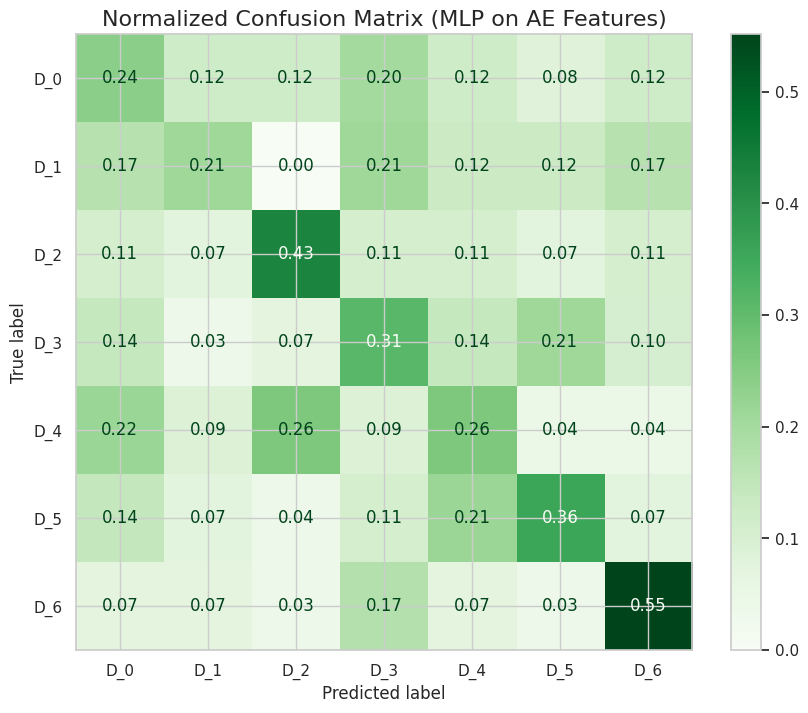

In [14]:
# --- Cell 14: Repeat Part (b) on Autoencoder Features ---
# We now train the *exact same* baseline MLP from Cell 9,
# but using our new, 32-dimensional encoded features.

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("\n--- (d) Part 2: Repeating Part (b) on AE Features ---")

# 1. Initialize the same MLP Classifier as in Cell 9
mlp_ae = MLPClassifier(hidden_layer_sizes=(100, 50),
activation='relu',
solver='adam',
max_iter=1000,
random_state=42)

# 2. Train the model on the NEW ENCODEN training data
print("Training MLP on 32 encoded features...")
mlp_ae.fit(X_train_encoded, y_train)
print("Training complete.")

# 3. Make predictions on the NEW ENCODEN test set
y_pred_ae = mlp_ae.predict(X_test_encoded)

# 4. Evaluate the new model's performance
print("\n--- Evaluation for MLP with Autoencoder Features ---")
print("Classification Report (AE Features):")
print(classification_report(y_test, y_pred_ae, target_names=le.classes_))

print("Generating Normalized Confusion Matrix (AE Features)...")
cm_ae = confusion_matrix(y_test, y_pred_ae)
cm_ae_normalized = cm_ae.astype('float') / cm_ae.sum(axis=1)[:, np.newaxis]

# 5. Plot the normalized confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ae_normalized,
display_labels=le.classes_)
disp.plot(cmap=plt.cm.Greens, values_format='.2f', ax=ax)
plt.title('Normalized Confusion Matrix (MLP on AE Features)', fontsize=16)
plt.savefig('cm_mlp_ae_features.png') # Save the plot
plt.show()

In [15]:
# (e) Part (e): Final Prediction System for a Specific Song
# =========================================================
import gdown
import pandas as pd
import numpy as np

print("--- (e) Starting Prediction for Single Song ---")

# 1. Load the specific dataset from Google Drive
# We use the file ID you provided: 1jC8LK-3_JE--23heWvgLVG4nwFKAWuPW
file_id = '1jC8LK-3_JE--23heWvgLVG4nwFKAWuPW'
output_file = 'MJMusicDataset_Test_Song.csv'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to Colab environment
gdown.download(url, output_file, quiet=False)

# Load into Pandas
df_single = pd.read_csv(output_file)
print("\nNew song data loaded successfully.")
display(df_single.head())

# 2. Preprocessing
# Identify metadata columns to drop (same as training phase)
# Note: 'filename' might be present in this new file, so we check for it
cols_to_drop = ['name', 'instrument', 'filename', 'dastgah'] # We drop dastgah if it exists (it's the target)
existing_cols_to_drop = [c for c in cols_to_drop if c in df_single.columns]

# Create Feature Matrix (X_single)
X_single = df_single.drop(columns=existing_cols_to_drop)

# --- CRITICAL STEP ---
# Transform the new data using the ALREADY FITTED scaler from Part (a)
# DO NOT fit a new scaler. Use the existing 'scaler' object.
X_single_scaled = scaler.transform(X_single)

# 3. Prediction
# Use the 'best_mlp_model' from Part (c)
prediction_idx = best_mlp_model.predict(X_single_scaled)[0]
prediction_prob = best_mlp_model.predict_proba(X_single_scaled)[0]

# Decode the result (Index -> Name)
predicted_dastgah = le.inverse_transform([prediction_idx])[0]
confidence = prediction_prob[prediction_idx] * 100

# 4. Output Result
print(f"\n========================================")
print(f" PREDICTION RESULT")
print(f"========================================")
print(f"Predicted Dastgah:  >>> {predicted_dastgah} <<<")
print(f"Confidence Level:       {confidence:.2f}%")
print(f"========================================")

# Optional: Show probabilities for all classes
print("\nProbabilities for all classes:")
for class_name, prob in zip(le.classes_, prediction_prob):
    print(f"{class_name}: {prob*100:.2f}%")

--- (e) Starting Prediction for Single Song ---


Downloading...
From: https://drive.google.com/uc?id=1jC8LK-3_JE--23heWvgLVG4nwFKAWuPW
To: /content/MJMusicDataset_Test_Song.csv
100%|██████████| 1.74k/1.74k [00:00<00:00, 6.00MB/s]


New song data loaded successfully.


,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_1_mean,chroma_2_mean,chroma_3_mean,chroma_4_mean,chroma_5_mean,...,mfcc_11_var,mfcc_12_var,mfcc_13_var,mfcc_14_var,mfcc_15_var,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var
0,23747,1205.35822,256940.0143,1876.813651,993961.1061,0.435627,0.595917,0.504618,0.14285,0.053317,...,167.873718,111.330795,408.299927,87.117699,100.372688,108.479935,83.637924,121.031212,77.103317,86.043045



 PREDICTION RESULT
Predicted Dastgah:  >>> D_2 <<<
Confidence Level:       95.67%

Probabilities for all classes:
D_0: 0.08%
D_1: 0.59%
D_2: 95.67%
D_3: 0.92%
D_4: 1.13%
D_5: 1.27%
D_6: 0.34%


In [16]:
import os
import joblib
from google.colab import drive
import tensorflow as tf

# ==========================================
# Model Persistence & Export to Google Drive
# ==========================================

# 1. Mount Google Drive
# This allows access to your personal Drive storage to save the models permanently.
drive.mount('/content/drive')

# 2. Define the Export Directory
# We define a specific path in Google Drive to organize the project artifacts.
# Change 'Persian-Music-Project' to your preferred folder name.
EXPORT_DIR = '/content/drive/MyDrive/Persian-Music-Classification/models'

# Ensure the directory exists; create it if it's missing.
if not os.path.exists(EXPORT_DIR):
    os.makedirs(EXPORT_DIR)
    print(f"[INFO] Created export directory: {EXPORT_DIR}")
else:
    print(f"[INFO] Export directory exists: {EXPORT_DIR}")

print("-" * 40)

# ==========================================
# Save Scikit-Learn Models (MLP)
# ==========================================

# Check if the optimized MLP model exists in the current session.
if 'best_mlp_model' in globals():
    mlp_path = os.path.join(EXPORT_DIR, 'mlp_optimized.pkl')

    # Serialize and save the model using joblib for efficiency.
    joblib.dump(best_mlp_model, mlp_path)
    print(f"[SUCCESS] Optimized MLP model saved to:\n   {mlp_path}")
else:
    print("[WARNING] 'best_mlp_model' not found in memory. Please run the GridSearchCV cell first.")

print("-" * 40)

# ==========================================
# Save TensorFlow/Keras Models (Autoencoder)
# ==========================================

# Check if the full Autoencoder model exists.
if 'autoencoder' in globals():
    ae_path = os.path.join(EXPORT_DIR, 'autoencoder_full.h5')

    # Save the entire model (architecture + weights + optimizer state) in HDF5 format.
    autoencoder.save(ae_path)
    print(f"[SUCCESS] Full Autoencoder model saved to:\n   {ae_path}")
else:
    print("[WARNING] 'autoencoder' not found. Please run the Autoencoder training cell first.")

# Check if the Encoder (feature extractor) exists.
if 'encoder' in globals():
    enc_path = os.path.join(EXPORT_DIR, 'encoder_part.h5')

    # Save the standalone encoder model for future feature extraction tasks.
    encoder.save(enc_path)
    print(f"[SUCCESS] Encoder model saved to:\n   {enc_path}")
else:
    print("[WARNING] 'encoder' not found in memory.")

print("=" * 40)
print("Model export process completed.")

Mounted at /content/drive


[INFO] Created export directory: /content/drive/MyDrive/Persian-Music-Classification/models
----------------------------------------
[SUCCESS] Optimized MLP model saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/mlp_optimized.pkl
----------------------------------------
[SUCCESS] Full Autoencoder model saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/autoencoder_full.h5
[SUCCESS] Encoder model saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/encoder_part.h5
Model export process completed.
